## Carga de Liberías

In [1]:
# Liberías necesarias para trabajar con Datos
import pandas as pd # Librería para trabajar con DataFrames
import numpy as np # Librería para trabajar con vectores y matrices
import matplotlib.pyplot as plt # Librería para realizar gráficos
import seaborn as sns # Librería para realizar gráficos
import scipy.stats as iqr # Librería para realizar gráficos

## Carga de Data

**Descripción**. Encuesta de preferencias alimentarias 2019.
Esta encuesta se realizó entre participantes de diferentes países y demografía.

In [7]:
data_frame = pd.read_csv('docs/Food_Preference.csv') # Cargamos el dataset
data_frame # Mostramos el dataset

,Timestamp,Participant_ID,Gender,Nationality,Age,Food,Juice,Dessert
0,2019/05/07 2:59:13 PM GMT+8,FPS001,Male,Indian,24,Traditional food,Fresh Juice,Maybe
1,2019/05/07 2:59:45 PM GMT+8,FPS002,Female,Indian,22,Western Food,Carbonated drinks,Yes
2,2019/05/07 3:00:05 PM GMT+8,FPS003,Male,Indian,31,Western Food,Fresh Juice,Maybe
3,2019/05/07 3:00:11 PM GMT+8,FPS004,Female,Indian,25,Traditional food,Fresh Juice,Maybe
4,2019/05/07 3:02:50 PM GMT+8,FPS005,Male,Indian,27,Traditional food,Fresh Juice,Maybe
...,...,...,...,...,...,...,...,...
283,2019/05/10 9:24:00 AM GMT+8,FPS284,Male,Indian,27,Western Food,Fresh Juice,Yes
284,2019/05/10 9:32:54 AM GMT+8,FPS285,Male,Indian,24,Traditional food,Fresh Juice,Yes
285,2019/05/10 12:09:17 PM GMT+8,FPS286,Male,Indian,25,Traditional food,Fresh Juice,Yes
286,2019/05/10 12:52:17 PM GMT+8,FPS287,Male,Indian,27,Traditional food,Fresh Juice,Yes


In [9]:
# Forma para acceder a una columna del dataset
data_frame.Gender

0        Male
1      Female
2        Male
3      Female
4        Male
        ...  
283      Male
284      Male
285      Male
286      Male
287      Male
Name: Gender, Length: 288, dtype: object

In [10]:
# Otra forma para acceder a una columna del dataset
data_frame["Gender"]

0        Male
1      Female
2        Male
3      Female
4        Male
        ...  
283      Male
284      Male
285      Male
286      Male
287      Male
Name: Gender, Length: 288, dtype: object

In [11]:
# Para acceder a más de una columna del dataset
data_frame[["Gender", "Nationality"]] # Se debe pasar una lista con los nombres de las columnas

,Gender,Nationality
0,Male,Indian
1,Female,Indian
2,Male,Indian
3,Female,Indian
4,Male,Indian
...,...,...
283,Male,Indian
284,Male,Indian
285,Male,Indian
286,Male,Indian


In [12]:
# Obtener el número de filas y columnas del dataset
data_frame.shape # (filas, columnas)

(288, 8)

In [13]:
# Obtener el nombre de las columnas del dataset
data_frame.columns

Index(['Timestamp', 'Participant_ID', 'Gender', 'Nationality', 'Age', 'Food',
       'Juice', 'Dessert'],
      dtype='object')

## Análisis Explicatorio

### Tipos de variables

In [14]:
# Revisión de los tipos de datos de las columnas del dataset
data_frame.dtypes

Timestamp         object
Participant_ID    object
Gender            object
Nationality       object
Age                int64
Food              object
Juice             object
Dessert           object
dtype: object

Usando el resultado anterior es posible detectar que se tienen 6 variables cualitativas y 2 variables cuantitativas.

**Variables Cualitativas:**

* Participant_ID: Variable nominal
* Gender: Variable nominal
* Nationality: Variable nominal
* Food: Variable nominal
* Juice: Variable nominal
* Dessert: Variable nominal

**Variables Cuantitativas:**
* Timestap: Variable de intervalos
* Age: Variable de Razón


### Variables numéricas

In [15]:
# Obtener un resumen de las columnas numéricas del dataset
numeric_feactures = data_frame.describe().columns # Se obtienen las columnas numéricas
numeric_feactures # Se muestran las columnas numéricas

Index(['Age'], dtype='object')

### Obtención de Medidas Estadísticas

In [16]:
data_frame.describe() # Se obtiene un resumen de las columnas numéricas

,Age
count,288.000000
mean,30.597222
std,11.180383
min,8.000000
25%,24.000000
50%,28.000000
75%,36.250000
max,80.000000


#### Interpretación

* **Primer quartil**. El 25% de los encuestados tiene una edad igual o menor a 24 años.
* El **promedio** de edad de los encuestados es de 31 años.
* **Desviación estándar**. La mayor concentración de datos tiene una edad que se encuentra entre los 20 y los 42 años.

In [17]:
data_frame.query("Age < 24") # Se obtienen las filas que cumplen con la condición. En este caso, las personas menores de 24 años

,Timestamp,Participant_ID,Gender,Nationality,Age,Food,Juice,Dessert
1,2019/05/07 2:59:45 PM GMT+8,FPS002,Female,Indian,22,Western Food,Carbonated drinks,Yes
8,2019/05/07 3:05:39 PM GMT+8,FPS009,Female,Indian,19,Traditional food,Fresh Juice,Yes
9,2019/05/07 3:06:53 PM GMT+8,FPS010,Female,Indian,16,Western Food,Fresh Juice,Yes
10,2019/05/07 3:07:26 PM GMT+8,FPS011,Male,Tanzanian,23,Traditional food,Fresh Juice,No
11,2019/05/07 3:07:36 PM GMT+8,FPS012,Female,Indian,22,Traditional food,Fresh Juice,Yes
...,...,...,...,...,...,...,...,...
254,2019/05/08 11:07:06 PM GMT+8,FPS255,Female,Indian,17,Traditional food,Fresh Juice,No
268,2019/05/10 1:09:22 AM GMT+8,FPS269,NaN,Indian,23,Traditional food,Fresh Juice,Yes
270,2019/05/10 1:11:07 AM GMT+8,FPS271,Male,Indian,23,Traditional food,Carbonated drinks,Yes
272,2019/05/10 1:12:09 AM GMT+8,FPS273,Male,Indian,23,Traditional food,Fresh Juice,Maybe


In [18]:
data_frame.query("Age > 20 and Age < 42") # Se obtienen las filas que cumplen con la condición. En este caso, las personas entre 20 y 42 años

,Timestamp,Participant_ID,Gender,Nationality,Age,Food,Juice,Dessert
0,2019/05/07 2:59:13 PM GMT+8,FPS001,Male,Indian,24,Traditional food,Fresh Juice,Maybe
1,2019/05/07 2:59:45 PM GMT+8,FPS002,Female,Indian,22,Western Food,Carbonated drinks,Yes
2,2019/05/07 3:00:05 PM GMT+8,FPS003,Male,Indian,31,Western Food,Fresh Juice,Maybe
3,2019/05/07 3:00:11 PM GMT+8,FPS004,Female,Indian,25,Traditional food,Fresh Juice,Maybe
4,2019/05/07 3:02:50 PM GMT+8,FPS005,Male,Indian,27,Traditional food,Fresh Juice,Maybe
...,...,...,...,...,...,...,...,...
283,2019/05/10 9:24:00 AM GMT+8,FPS284,Male,Indian,27,Western Food,Fresh Juice,Yes
284,2019/05/10 9:32:54 AM GMT+8,FPS285,Male,Indian,24,Traditional food,Fresh Juice,Yes
285,2019/05/10 12:09:17 PM GMT+8,FPS286,Male,Indian,25,Traditional food,Fresh Juice,Yes
286,2019/05/10 12:52:17 PM GMT+8,FPS287,Male,Indian,27,Traditional food,Fresh Juice,Yes


In [21]:
data_frame.describe(include=np.object0) # Se obtiene un resumen de las columnas categóricas. object0 es el tipo de dato de las columnas categóricas.

C:\Users\fmira\AppData\Local\Temp\ipykernel_23292\4254514705.py:1: DeprecationWarning: `np.object0` is a deprecated alias for ``np.object0` is a deprecated alias for `np.object_`. `object` can be used instead.  (Deprecated NumPy 1.24)`.  (Deprecated NumPy 1.24)
  data_frame.describe(include=np.object0) # Se obtiene un resumen de las columnas categóricas


,Timestamp,Participant_ID,Gender,Nationality,Food,Juice,Dessert
count,288,288,284,288,288,288,288
unique,285,288,2,27,2,2,3
top,2019/05/08 1:16:11 AM GMT+8,FPS001,Female,Indian,Traditional food,Fresh Juice,Maybe
freq,2,1,165,241,238,256,122


### Datos Nulos

In [22]:
data_frame.isnull().sum() # Se obtiene la cantidad de valores nulos por columna

Timestamp         0
Participant_ID    0
Gender            4
Nationality       0
Age               0
Food              0
Juice             0
Dessert           0
dtype: int64

#### Técnicas de tratamiento de datos nulos
1. Eliminar las observaciones (Opción Simple)
2. Imputación (Mejor Opción). Acá se rellenan los valores vacíos con algún valor, puede ser el promedio del valor de la columna, tambien puede ser el valor más repetido en el caso de una variable categórica.
3. Una extensión de la imputación. Se agrega una columna indicando que el valor ha sido reemplazado, de esta forma, se mantiene "identificados" a los valores nulos.

In [23]:
# Tratamiento de valores nulos a través de la imputación
moda = data_frame["Gender"].mode()[0] # Se obtiene la moda de la columna Gender. Se obtiene el primer valor de la moda.add()
data_frame.Gender = data_frame.Gender.fillna(moda) # Se reemplazan los valores nulos por la moda
# Comprobación de que no existen valores nulos
data_frame.isnull().sum()

Timestamp         0
Participant_ID    0
Gender            0
Nationality       0
Age               0
Food              0
Juice             0
Dessert           0
dtype: int64

#### Nota importante
Este tema será profundizado más adelante

### Interpretación de Medidas
Volvamos a la columna de la edad

In [24]:
data_frame.Age.describe() # Se obtiene un resumen de la columna Age

count    288.000000
mean      30.597222
std       11.180383
min        8.000000
25%       24.000000
50%       28.000000
75%       36.250000
max       80.000000
Name: Age, dtype: float64

#### Interpretación
* Una importante concentración de los encuestados tiene una edad dentro del intervalo [31 - 11 ; 31 + 11], es decir, [20 ; 42] (Recordar la fórmula $[\mu - \sigma; \mu + \sigma]$)
* El 75% de los encuestados tiene una edad igual o inferior a 36 años.
* El 25% de los encuestados tiene una edad igual o inferior a 24 años.

**¿Podemos comprobar lo anterior?**

In [38]:
# Calcular y mostrar el intervalo
mean, std = np.mean(data_frame.Age), np.std(data_frame.Age) # Se obtiene la media y la desviación estándar de la columna Age
lim_inf, lim_sup = mean - std, mean + std # Se calculan los límites inferior y superior
print(f"Intervalo: [{lim_inf:.2f}, {lim_sup:.2f}]") # Se muestra el intervalo

# Buscar ocurrencias de valores atípicos
analizados = data_frame.query(f"Age >= {lim_inf} and Age <= {lim_sup}")['Age'].count() # Se obtienen las filas que cumplen con la condición. En este caso, las personas entre 20 y 42 años
total = data_frame.shape[0] # Se obtiene el total de filas
print(f"{analizados/total*100:.2f}") # Se muestra el porcentaje de filas que cumplen con la condición

Intervalo: [19.44, 41.76]
78.82


In [40]:
# Calcular el tercer cuartil
tercerCuartil = np.quantile(data_frame.Age, 0.75) # Se obtiene el tercer cuartil
print(f"Tercer cuartil: {tercerCuartil:.2f}") # Se muestra el tercer cuartil

# Buscar ocurrencias de valores atípicos
analizados = data_frame.query(f"Age <= {tercerCuartil}")['Age'].count() # Se obtienen las filas que cumplen con la condición.
total = data_frame.shape[0] # Se obtiene el total de filas
print(f"{analizados/total*100:.2f}") # Se muestra el porcentaje de filas que cumplen con la condición

Tercer cuartil: 36.25
75.00


In [42]:
# Calcular el primer cuartil
primerCuartil = np.quantile(data_frame.Age, 0.25) # Se obtiene el primer cuartil
print(f"Primer cuartil: {primerCuartil:.2f}") # Se muestra el primer cuartil

# Buscar ocurrencias de valores atípicos
analizados = data_frame.query(f"Age <= {primerCuartil}")['Age'].count() # Se obtienen las filas que cumplen con la condición.
total = data_frame.shape[0] # Se obtiene el total de filas
print(f"{analizados/total*100:.2f}") # Se muestra el porcentaje de filas que cumplen con la condición

Primer cuartil: 24.00
30.56


### Revisión de Asimetría

* **Para calcular la moda:**

Utilizamos la biblioteca pandas para calcular la moda de la columna “Age” en un DataFrame llamado data_frame.

<code>data_frame.groupby("Age")</code>: Este comando agrupa el DataFrame por la columna “Age”, es decir, crea grupos de filas que tienen el mismo valor en la columna “Age”.

<code>["Age"].count()</code>: Luego, para cada grupo creado en el paso anterior, cuenta cuántas filas hay en ese grupo. Esto da como resultado una serie donde el índice son los valores únicos de “Age” y los valores son el número de veces que cada valor de “Age” aparece en el DataFrame.

<code>.sort_values(ascending=False)</code>: Este comando ordena los valores de la serie en orden descendente. Por lo tanto, los valores de “Age” que aparecen con más frecuencia estarán en la parte superior.

<code>[:1]</code>: Esto selecciona el primer elemento de la serie ordenada, es decir, el valor de “Age” que aparece con más frecuencia.

<code>.values[0]</code>: Finalmente, este comando extrae el valor numérico del conteo para la moda.

Por lo tanto, moda será el número de veces que el valor más común de “Age” aparece en el DataFrame.

In [43]:
moda = data_frame.groupby("Age")["Age"].count().sort_values(ascending=False)[:1].values[0] # Se obtiene la moda de la columna Age
mediana = np.quantile(data_frame.Age, 0.5) # Se obtiene la mediana de la columna Age
media = np.mean(data_frame.Age) # Se obtiene la media de la columna Age

# Mostramos cada uno de los valores
print(f"Moda: {moda:.2f} - Mediana: {mediana:.2f} - Media: {media:.2f}")

Moda: 23.00 - Mediana: 28.00 - Media: 30.60


##### Interpretación de la relación
El orden que se da en la recta es moda - mediana y media; por lo tanto, existe una **asimetría hacia la derecha (simetría positiva).**
![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS2CS82dzN23KbujJcy7S_lf-ghamH3OKkhGA&usqp=CAU)

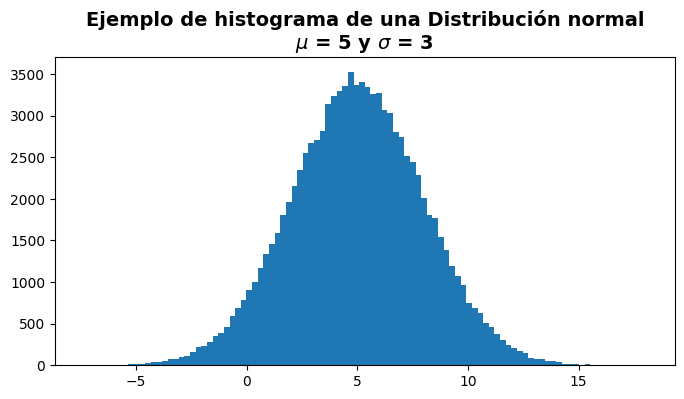

In [50]:
import random # Librería para generar números aleatorios
plt.figure(figsize=(8, 4)) # Se define el tamaño de la figura

# Genera 100mil valores aleatorios desde una distribución normal con media 5 y desviación estándar 3
random.seed(29) # Se establece una semilla para generar los mismos valores aleatorios
random_values = [random.normalvariate(5, 3) for i in range(100000)] # Se generan los valores aleatorios
plt.hist(random_values, bins=100) # Se grafica el histograma
# Asignamos un titulo al gráfico
plt.title("Ejemplo de histograma de una Distribución normal\n$\mu$ = 5 y $\sigma$ = 3", fontsize=14, fontweight="bold")
plt.show() # Se muestra el gráfico

In [51]:
# Calcular las medias para comprobar
print(f"Media: {np.mean(random_values):.2f} - Distribución estándar: {np.std(random_values):.2f} - Mediana: {np.quantile(random_values, 0.5):.2f}")

Media: 5.00 - Distribución estándar: 2.99 - Mediana: 5.00


## ¿Qué se puede hacer?
Intentemos responder a las siguientes preguntas
* ¿Quiénes piden más postres, hombres o mujeres?
* ¿Cuál es la preferencia de los encuestados, considerando género y tipo de comida?
* ¿Quiénes son más indecisos a la hora de escoger, hombres o mujeres?
* ¿Quiénes prefieren más la comida occidental, hombres o mujeres?
* ¿Cuál es el promedio de edad de las personas que prefieren la comida tradicional?